In [2]:
#import needed packages

from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [3]:
#import dataset - fashion MNIST (example dataset that has images of clothing, classified in 10 categories)

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
#need class names instead of just classification numbers

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
#EDA

print(train_images.shape)
print(len(train_labels))
print(train_labels[0:19])

print(test_images.shape)
print(len(test_labels))
print(test_labels[0:19])


(60000, 28, 28)
60000
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6]
(10000, 28, 28)
10000
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8]


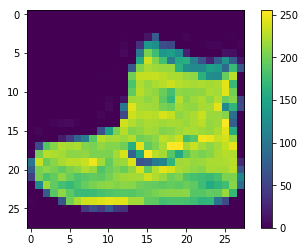

In [10]:
#plot a single image

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
#scale the image values

train_images = train_images / 255.0

test_images = test_images / 255.0



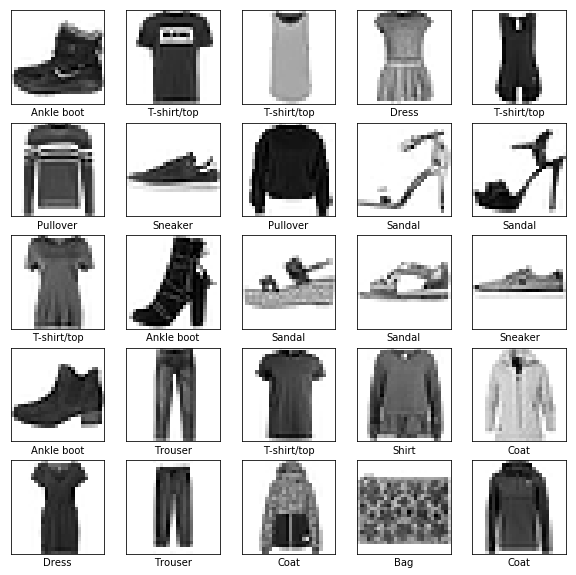

In [12]:
#display first 25 images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
#setup the model
#setup the layers
#flatten takes the 28 X 28 pixels and transforms to a 1-d array of 784 pixels (28*28)
#1st dense sets up first layer of 128 nodes
#2nd dense is called "softmax layer".  Basically gives probability score image belongs to 10 different classes

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])



Instructions for updating:
Colocations handled automatically by placer.


In [15]:
#create a few more settings for the model (loss function, optimizer, eval metrics)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#train the model

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4968 - acc: 0.8243
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3733 - acc: 0.8657
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3346 - acc: 0.8780
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3119 - acc: 0.8865
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2937 - acc: 0.8918


In [17]:
#evaluate model performance on test data

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3632 - acc: 0.8683
Test accuracy: 0.8683


In [20]:
#create predictions dataset from test_images
predictions = model.predict(test_images)

#print prediction array for first row
print(predictions[0])

#print the highest likelihood classification for first row
print(np.argmax(predictions[0]))

#print actual classification for first row
print(test_labels[0])

[4.1008707e-06 1.0971475e-07 1.4536866e-07 4.2399411e-06 2.7191059e-06
 4.0938007e-03 2.3706027e-05 8.7842777e-02 2.4314379e-06 9.0802598e-01]
9
9


In [21]:
#create plot functions
#will show a correct classification bar as blue (along with blue caption text)
#will show an incorrect classification bar as red (along with red caption text)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

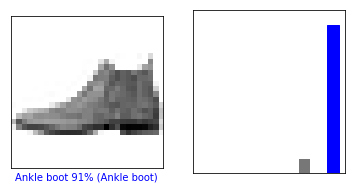

In [22]:
#check the first row image and bar chart

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

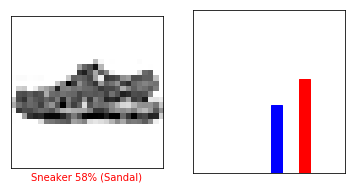

In [28]:
#demonstrate an inccorect image and bar chart

i = 21
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

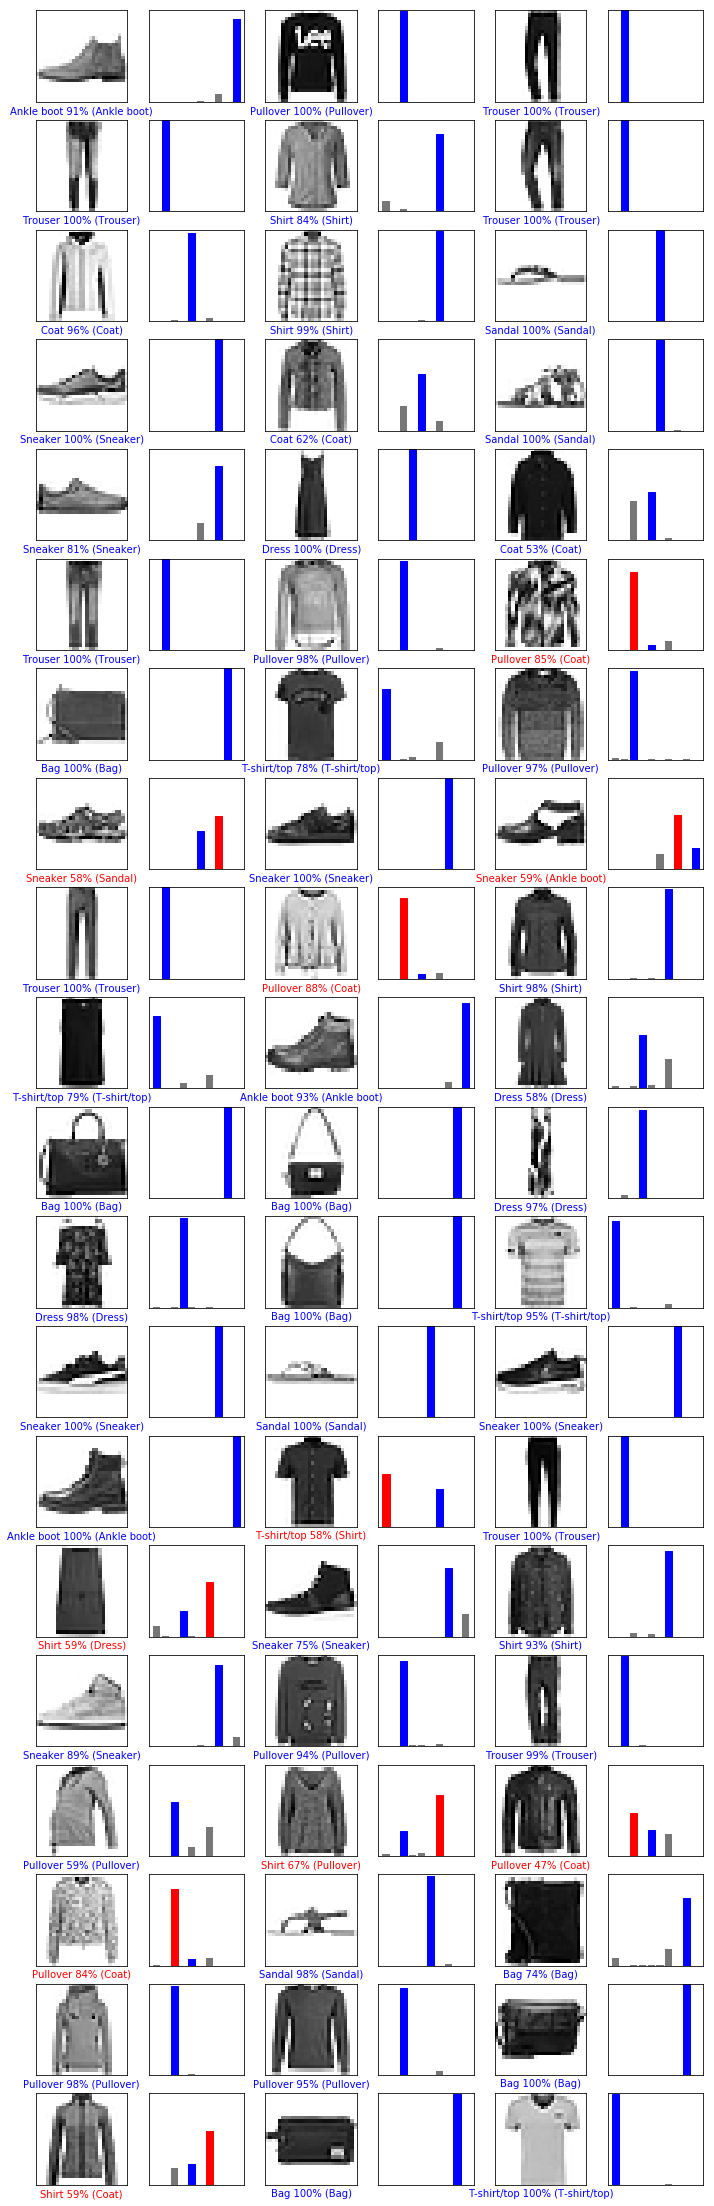

In [29]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 20
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()